In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D

Define a datamodel

In [12]:
d = 1000

In [13]:
vanilla_gaussian_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
}

vanilla_gaussian_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=vanilla_gaussian_kwargs,
    name="vanilla_gaussian"
)


Define an experiment

In [14]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=0,
    alphas=np.linspace(4,5,5),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.OptimalLambda,
    data_models = [vanilla_gaussian_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.Logistic,
    gamma_fair_error=0.01,
    name="optimal_lambda"
)
experiment_json = experiment.to_json()

In [15]:
with open("optimal_lambda.json", "w") as f:
    f.write(experiment_json)

In [16]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment optimal_lambda
INFO:root:Starting Experiment optimal_lambda
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:This process has rank 3
INFO:root:This process has rank 4
  0%|          | 0/20 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Initializing data model


2025-02-27 20:20:46,039 - Rank 0 - INFO - The MPI comm size is 5
2025-02-27 20:20:46,039 - Rank 0 - INFO - This process has rank 0
2025-02-27 20:20:46,039 - Rank 0 - INFO - Starting Master for experiment optimal_lambda
2025-02-27 20:20:46,039 - Rank 0 - INFO - Starting Experiment optimal_lambda
2025-02-27 20:20:46,048 - Rank 0 - INFO - Starting all processes
2025-02-27 20:20:46,049 - Rank 0 - INFO - Sending task 0 to 1
2025-02-27 20:20:46,049 - Rank 0 - INFO - Sending task 1 to 2
2025-02-27 20:20:46,049 - Rank 0 - INFO - Sending task 2 to 3
2025-02-27 20:20:46,049 - Rank 0 - INFO - Sending task 3 to 4
2025-02-27 20:20:46,049 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-27 20:20:46,049 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-02-27 20:20:54,243 - Rank 0 - INFO - Received task 2 from 2
2025-02-27 20:20:54,243 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.0064256590315916375, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x15885b890>)
2025-02-27 20:20:54,245 - Rank 0 - INFO - Received the 1th task


INFO:root:Received task 1 from 1
INFO:root:Saved Task(id=1, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.006834286980089272, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd2550>)
 10%|█         | 2/20 [00:08<01:05,  3.65s/it]INFO:root:Received the 2th task
INFO:root:Starting task 6
INFO:root:Initializing data model
INFO:root:Generalization error for lambda 0.004239404463540511 is 0.1050022933559808

2025-02-27 20:20:54,709 - Rank 0 - INFO - Received task 1 from 1
2025-02-27 20:20:54,709 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.006834286980089272, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd2550>)
2025-02-27 20:20:54,711 - Rank 0 - INFO - Received the 2th task


INFO:root:Generalization error for lambda 0.0014061683986592256 is 0.10675897874696266
INFO:root:Generalization error for lambda 0.003697802938123914 is 0.10498901991614354
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0

2025-02-27 20:20:59,237 - Rank 0 - INFO - Received task 5 from 2
2025-02-27 20:20:59,237 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.0, test_against_epsilons=[0.2], lam=0.006262100737700103, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd2a50>)
2025-02-27 20:20:59,238 - Rank 0 - INFO - Received the 3th task


INFO:root:Generalization error for lambda 0.00579040256295964 is 0.099632071890129
INFO:root:Generalization error for lambda 0.00033118739787310126 is 0.10636979710148858
INFO:root:Generalization error for lambda 0.00378696976876479 is 0.10498840591906582
INFO:root:Generalization error for lambda 0.005784900479544931 is 0.09963207097204309
INFO:root:Generalization error for lambda 0.005785236300517551 is 0.09963207096796213
INFO:root:Generalization error for lambda 0.0037869765477712347 is 0.10498840591906602
INFO:root:Minimized success: True; Message: Solution found.
INFO:root:iter_nb: 0, err: 1.0
INFO:root:error: 1.0
INFO:root:Generalization error for lambda 0.005785243743564259 is 0.09963207096796065
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Generalization error for lambda 0.005785247162706624 is 0.09963207096796144
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INF

2025-02-27 20:21:01,638 - Rank 0 - INFO - Received task 3 from 3
2025-02-27 20:21:01,638 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.0037869731582680123, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd2fd0>)
2025-02-27 20:21:01,639 - Rank 0 - INFO - Received the 4th task


INFO:root:Generalization error for lambda 0.04085534904930384 is 0.1073794957505903
INFO:root:Generalization error for lambda 0.02524961236869923 is 0.10472658800330356
INFO:root:Received task 6 from 1
INFO:root:Saved Task(id=6, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.1, test_against_epsilons=[0.2], lam=0.005785243743564259, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd34d0>)
 25%|██▌       | 5/20 [00:16<00:36,  2.43s/it]INFO:r

2025-02-27 20:21:02,341 - Rank 0 - INFO - Received task 6 from 1
2025-02-27 20:21:02,341 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.1, test_against_epsilons=[0.2], lam=0.005785243743564259, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd34d0>)
2025-02-27 20:21:02,342 - Rank 0 - INFO - Received the 5th task


INFO:root:Generalization error for lambda 0.015604736680604615 is 0.10270250939982081
INFO:root:Generalization error for lambda 0.009643875688094616 is 0.10126066354230738
INFO:root:Generalization error for lambda 0.00012588429535314015 is 0.10630551845109247
INFO:root:Generalization error for lambda 0.005959860992510003 is 0.10035632038246696
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0.

2025-02-27 20:21:07,636 - Rank 0 - INFO - Received task 9 from 1
2025-02-27 20:21:07,636 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.5, epsilon=0.0, test_against_epsilons=[0.2], lam=0.0057669555139803, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd3990>)
2025-02-27 20:21:07,637 - Rank 0 - INFO - Received the 6th task


INFO:root:Generalization error for lambda 0.002275846296925389 is 0.10281805243592622
INFO:root:Generalization error for lambda 0.0030368783957249942 is 0.09991102490580653
INFO:root:Generalization error for lambda 2.895331898050177e-05 is 0.10627780061651569
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 

2025-02-27 20:21:11,620 - Rank 0 - INFO - Received task 7 from 2
2025-02-27 20:21:11,620 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.2, test_against_epsilons=[0.2], lam=0.0030380387057848033, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd3dd0>)
2025-02-27 20:21:11,621 - Rank 0 - INFO - Received the 7th task


INFO:root:Generalization error for lambda 0.005224071792428094 is 0.09499172174615655
INFO:root:Generalization error for lambda 0.005224062327536838 is 0.0949917217461527
INFO:root:Generalization error for lambda 6.071019431133118e-06 is 0.10627157196189657
INFO:root:Generalization error for lambda 0.005224058916718138 is 0.09499172174615356
INFO:root:Generalization error for lambda 0.0002043031025199611 is 0.10193873081614659
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 

2025-02-27 20:21:13,884 - Rank 0 - INFO - Received task 10 from 1
2025-02-27 20:21:13,884 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.5, epsilon=0.1, test_against_epsilons=[0.2], lam=0.005224062327536838, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe4750>)
2025-02-27 20:21:13,885 - Rank 0 - INFO - Received the 8th task


INFO:root:Generalization error for lambda 0.04085534904930384 is 0.10326431684127405
INFO:root:Generalization error for lambda 0.02524961236869923 is 0.10060859753696262
INFO:root:Generalization error for lambda 3.3701303435512137e-06 is 0.10627084550216004
INFO:root:Generalization error for lambda 0.00012588429535314015 is 0.10190396104894202
INFO:root:Generalization error for lambda 0.015604736680604615 is 0.09855163892132078
INFO:root:Generalization error for lambda 0.009643875688094616 is 0.09704380509593215
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0

2025-02-27 20:21:23,446 - Rank 0 - INFO - Received task 11 from 2
2025-02-27 20:21:23,446 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.5, epsilon=0.2, test_against_epsilons=[0.2], lam=0.0023880668240170468, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe4990>)
2025-02-27 20:21:23,448 - Rank 0 - INFO - Received the 9th task


INFO:root:Generalization error for lambda -9.06976373054225e-07 is 0.1062696989970166
INFO:root:Generalization error for lambda 4.746548818631921e-05 is 0.09808097319756141
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0

2025-02-27 20:21:27,141 - Rank 0 - INFO - Received task 13 from 2
2025-02-27 20:21:27,141 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.75, epsilon=0.0, test_against_epsilons=[0.2], lam=0.005336197358996133, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe4d50>)
2025-02-27 20:21:27,150 - Rank 0 - INFO - Received the 10th task


INFO:root:Generalization error for lambda -7.564609828991707e-07 is 0.1018478536220768
INFO:root:Generalization error for lambda 6.071019431133118e-06 is 0.09806079632156743
INFO:root:Generalization error for lambda -9.78040100527216e-07 is 0.10626967998938047
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]


2025-02-27 20:21:33,109 - Rank 0 - INFO - Received task 14 from 2
2025-02-27 20:21:33,109 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.75, epsilon=0.1, test_against_epsilons=[0.2], lam=0.004729246672009158, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe5190>)
2025-02-27 20:21:33,111 - Rank 0 - INFO - Received the 11th task


INFO:root:Generalization error for lambda -6.059455927441163e-07 is 0.09805753420131007
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe5710>)
 60%|██████    | 12/20 [00:48<00:31,  3.95s/it]INFO:root:Received the 12th task
INFO:root:Starting task 16
INFO:root:Initializing da

2025-02-27 20:21:34,439 - Rank 0 - INFO - Received task 4 from 4
2025-02-27 20:21:34,439 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.0, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe5710>)
2025-02-27 20:21:34,441 - Rank 0 - INFO - Received the 12th task


INFO:root:Generalization error for lambda -9.864280357362886e-07 is 0.10184775186755107
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [

2025-02-27 20:21:39,524 - Rank 0 - INFO - Received task 8 from 3
2025-02-27 20:21:39,524 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe5c10>)
2025-02-27 20:21:39,526 - Rank 0 - INFO - Received the 13th task


INFO:root:Received task 8 from 3
INFO:root:Saved Task(id=8, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.25, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe5c10>)
 65%|██████▌   | 13/20 [00:53<00:30,  4.29s/it]INFO:root:Received the 13th task
INFO:root:Starting task 17
INFO:root:Initializing data model
INFO:root:Generalization error for lambda 0.002275846296925389 is 0.0957314972

2025-02-27 20:21:43,092 - Rank 0 - INFO - Received task 17 from 3
2025-02-27 20:21:43,092 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=5.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.004959545640968072, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe60d0>)
2025-02-27 20:21:43,093 - Rank 0 - INFO - Received the 14th task


INFO:root:Generalization error for lambda 0.00181063962071627 is 0.09118386018351385
INFO:root:Generalization error for lambda 0.0002043031025199611 is 0.0948375287627709
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]

2025-02-27 20:21:45,547 - Rank 0 - INFO - Received task 12 from 1
2025-02-27 20:21:45,547 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.5, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe66d0>)
2025-02-27 20:21:45,548 - Rank 0 - INFO - Received the 15th task


INFO:root:Generalization error for lambda 7.741880716682097e-05 is 0.09477667123761681
INFO:root:Generalization error for lambda 0.0018238419743518443 is 0.09118382591544504
INFO:root:Generalization error for lambda 0.0036830146955846143 is 0.08695765851960169
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]


2025-02-27 20:21:50,029 - Rank 0 - INFO - Received task 18 from 3
2025-02-27 20:21:50,029 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=5.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.004290369988410504, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe6b50>)
2025-02-27 20:21:50,030 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-02-27 20:21:51,424 - Rank 0 - INFO - Received task 15 from 2
2025-02-27 20:21:51,425 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.75, epsilon=0.2, test_against_epsilons=[0.2], lam=0.0018242296531357268, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe6fd0>)
2025-02-27 20:21:51,425 - Rank 0 - INFO - Received the 17th task


INFO:root:Generalization error for lambda 0.1730692718853099 is 0.11165762389553266
INFO:root:Generalization error for lambda 0.10696231046730688 is 0.10730379615149169
INFO:root:Generalization error for lambda 0.06610596141800305 is 0.10366019257474703
INFO:root:Generalization error for lambda 0.04085534904930384 is 0.10067816360416958
INFO:root:Generalization error for lambda 0.02524961236869923 is 0.09829352811105685
INFO:root:Generalization error for lambda 1.700889087581905e-06 is 0.09473993301857389
INFO:root:Generalization error for lambda 0.015604736680604615 is 0.09643455775652165
INFO:root:Generalization error for lambda 0.009643875688094616 is 0.09502571881053981
INFO:root:Generalization error for lambda 0.005959860992510003 is 0.0939901702722503
INFO:root:Generalization error for lambda 6.692412559693091e-07 is 0.09473943027334744
INFO:root:Generalization error for lambda 0.0036830146955846143 is 0.09325272888401749
INFO:root:Generalization error for lambda 0.00046874376691

2025-02-27 20:22:02,313 - Rank 0 - INFO - Received task 16 from 4
2025-02-27 20:22:02,313 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.75, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe7d10>)
2025-02-27 20:22:02,313 - Rank 0 - INFO - Received the 18th task


INFO:root:Received task 16 from 4
INFO:root:Saved Task(id=16, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=4.75, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fe7d10>)
 90%|█████████ | 18/20 [01:16<00:10,  5.45s/it]INFO:root:Received the 18th task
INFO:root:Generalization error for lambda 6.692412559693091e-07 is 0.09178988183378903
INFO:root:Generalization error for lambda 0.001336

2025-02-27 20:22:05,424 - Rank 0 - INFO - Received task 19 from 1
2025-02-27 20:22:05,424 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=5.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.0013352035516419566, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158fd1590>)
2025-02-27 20:22:05,424 - Rank 0 - INFO - Received the 19th task


INFO:root:Generalization error for lambda -7.564609828991707e-07 is 0.09178921488259674
INFO:root:Generalization error for lambda -8.494846098449456e-07 is 0.09178917136183899
INFO:root:Generalization error for lambda -9.06976373054225e-07 is 0.09178914446429874
INFO:root:Generalization error for lambda -9.425082367907205e-07 is 0.09178912784061567
INFO:root:Generalization error for lambda -9.644681362635046e-07 is 0.09178911756658036
INFO:root:Generalization error for lambda -9.78040100527216e-07 is 0.09178911121686394
INFO:root:Generalization error for lambda -9.864280357362886e-07 is 0.0917891072925188
INFO:root:Generalization error for lambda -9.916120647909275e-07 is 0.09178910486713815
INFO:root:Generalization error for lambda -9.949454128322446e-07 is 0.09178910330760924
INFO:root:Minimized success: True; Message: Solution found.
INFO:root:iter_nb: 0, err: 1.0
INFO:root:error: 1.0
INFO:root:Finished optimal lambda Task(id=20, task_type=<TaskType.OL: 2>, erm_problem_type=None, al

2025-02-27 20:22:11,781 - Rank 0 - INFO - Received task 20 from 3
2025-02-27 20:22:11,781 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.OL: 2>, erm_problem_type=None, alpha=5.0, epsilon=0.3, test_against_epsilons=[0.2], lam=-9.949454128322446e-07, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla_gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.optimal_lambda.OptimalLambdaResult object at 0x158ff4750>)
2025-02-27 20:22:11,781 - Rank 0 - INFO - All tasks sent and received
2025-02-27 20:22:11,788 - Rank 0 - INFO - Marking experiment optimal_lambda as finis

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "optimal_lambda", "state_evolution_repetitions": 1, "erm_repetitions": 0, "alphas": [4.0, 4.25, 4.5, 4.75, 5.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "OptimalLambda", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b8_diagonal": {"diagonal": [[1, 1000]]}, "\\u03c9_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b4_diagonal": {"diagonal": [[1, 1000]]}, "\\u03bd_diagonal": {"diagonal": [[1, 1000]]}}, "name": "vanilla_gaussian", "description": "", "gamma": 1}], "erm_problem_type": "Logistic", "gamma_fair_error": 0.01}', '--log-level', 'INFO'], returncode=0)

In [17]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [18]:
df

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,n_m,n_q,n_sigma,n_A,n_P,…,values_std,gamma_fair_error_std,gamma_std,generalization_error_std,adversarial_generalization_errors_std,training_error_std,training_loss_std,test_losses_std,m_std,q_std,sigma_std,A_std,P_std,F_std,m_hat_std,q_hat_std,sigma_hat_std,A_hat_std,F_hat_std,P_hat_std,n_m_std,n_q_std,n_sigma_std,n_A_std,n_P_std,n_F_std,angle_std,data_model_angle_std,data_model_attackability_std,data_model_adversarial_test_errors_std,sigmax_eigenvalues_std,sigmaθ_eigenvalues_std,xθ_eigenvalues_std,mu_usefulness_std,gamma_robustness_es_std,mu_margin_std,optimal_lambda_std
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,list[f64],list[f64],list[f64],f64,f64,f64,f64
4.5,0.0,0.05,0.005767,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.094925,0.193999,0.000054,0.040773,6.57877,7.425873,60.203296,14.379215,60.203296,60.203296,7.425873,0.516431,0.024471,0.063778,0.0,0.0,0.0,7.425873,60.203296,14.379215,60.203296,60.203296,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4.75,0.0,0.05,0.005336,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.090705,0.190686,0.000061,0.039373,7.378706,7.805727,65.992598,14.188616,65.992598,65.992598,7.805727,0.55014,0.025151,0.065143,0.0,0.0,0.0,7.805727,65.992598,14.188616,65.992598,65.992598,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4.25,0.1,0.05,0.005785,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.099632,0.197772,0.000244,1.859986,7.485983,7.760319,66.364615,9.888911,66.364615,66.364615,7.760319,0.78475,0.062808,0.092045,0.0,0.0,0.003293,7.760319,66.364615,9.888911,66.364615,66.364615,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.0,0.0,0.05,0.00496,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.086857,0.18773,0.000069,0.038111,8.22553,8.179627,71.966175,13.99227,71.966175,71.966175,8.179627,0.584582,0.025844,0.066508,0.0,0.0,0.0,8.179627,71.966175,13.99227,71.966175,71.966175,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4.25,0.0,0.05,0.006262,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.09957,0.197722,0.000047,0.042331,5.828513,7.040196,54.612529,14.563045,54.612529,54.612529,7.040196,0.483429,0.023803,0.062405,0.0,0.0,0.0,7.040196,54.612529,14.563045,54.612529,54.612529,…,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4.75,0.2,0.05,0.001824,0.2,"""vanilla_gaussian""",null,null,null,null,null,1000.0,{},0.01,1.0,0.091184,0.191058,0.001763,16.371774,17.084194,10.87702,128.254435,7.215322,128.254435,128.254435,10.87702,1.507489,0.191024,0.128487,0.0,0.0,0.008283,10.87702,128.254435,7.215322,128.254435,128.254435,…,{},null,

In [19]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

Figure size:  [1.75 2.4 ]


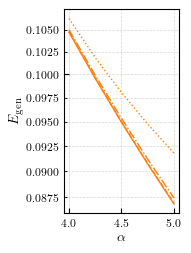

In [21]:
IMG_DIRECTORY = "./Assets/gen_optimal_lambda_alpha"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.75 * 458.63788

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = (1.75 , 2.4)

multiplier = 0.9
second_multiplier = 0.35

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=( tuple_size[0],  tuple_size[1]),
    gridspec_kw={"hspace": 0},
)

# print the figure size
print("Figure size: ", fig.get_size_inches())


# ICML adjustments
fig.subplots_adjust(left=0.33)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.99)

linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, epsilon in enumerate(epsilons):


    df_filtered = df.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error


    # axs.plot(lams, adversarial_error, label=r"$E_{\mathrm{adv}}$", color="C0", linestyle=linestyles[idx])
    axs.plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    # axs.plot(lams, boundary_error, label=r"$E_{\mathrm{bound}}$", color="C2", linestyle=linestyles[idx])

import matplotlib as mpl


# axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylabel(r"$E_{\mathrm{gen}}$", labelpad=2.0)
axs.set_xlabel(r"$\alpha$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.tick_params(axis="both", which="major", direction="in")
axs.tick_params(axis="both", which="minor", direction="in")

# axs.legend(title="$\\boldsymbol{a}$",loc="lower left")

# axs.ticklabel_format(axis="y", style='sci', scilimits=(-2, 2))
# make the y axis not have number*10^-1, but number with the scale 10^-1
axs.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.4f'))
axs.yaxis.set_minor_formatter(mpl.ticker.FormatStrFormatter('%.4f'))


epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

# fig.legend(handles=epsilon_legend, loc="upper center", ncol=4, handlelength=1.5)



# plt.tight_layout()

save = True
if save:
    save_plot(
        fig,
        "gen_lambda_optimal_sweep_alpha",
    )

plt.show()

Figure size in inches:  [0.175 1.2  ]


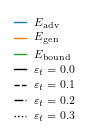

In [22]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1*tuple_size[0], 0.5*tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

# display figure size
print("Figure size in inches: ", figlegend.get_size_inches())

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 


# merge the two legends by concatenating the lists
custom_legend = error_legend + epsilon_legend


figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "vertical_legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()